In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative


## Herstellen der Ammoniak Lösung

In [54]:

Dichte_Lsg = 1   # g/mL
Molmasse_NH3 = 17.031 # g/mol

c0_NH3 = 0.25 * ((Dichte_Lsg*1e3 )/ Molmasse_NH3)
print(c0_NH3)
Volumen_Lsg = 100 / c0_NH3 #mL
print("benötigtes Volumen 25%NH3 Lösung für 100mL: V(NH3)=" + str(Volumen_Lsg) + "mL")

14.679114555809994
benötigtes Volumen 25%NH3 Lösung für 100mL: V(NH3)=6.8124mL


Die Auswertung der Titrationskurve erfolgt bestenfalls von Hand

# Schematischer erwarteter Potentialumschwung

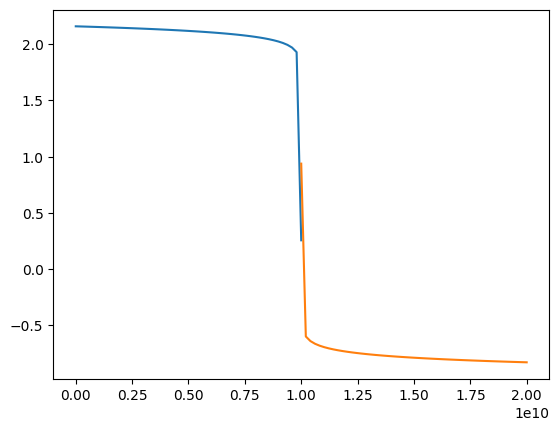

In [53]:
F =96485.3321
R= 8.3145
z = 1
cs = np.linspace(0,1e10 - 0.0001)
es = 0.8 - (0.059)*np.log(1/(1e10-cs))
fig, ax = plt.subplots()
cs1 = np.linspace(1e10 + 0.001,2e10)
es1 = (0.53-(0.059)*np.log(cs1-1e10))
ax.plot(cs, es)
ax.plot(cs1, es1)


